# **User & Entity Behavioral Analytics (UEBA) ML Project**

## **Load Datasets & Libraries**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_csv('/cyberguarduserbehavior.csv', encoding='latin-1') # Specify the encoding as 'latin-1'



## **Data Preparation & Preprocessing**

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].astype(int) / 10**9

y = df['label']
y

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#### **Encoding Categorial  Columns**

In [ ]:
x = df.drop('label', axis=1)


In [ ]:


label_encoder = LabelEncoder()
for col in x.select_dtypes(include=['object']).columns:
    x[col] = label_encoder.fit_transform(x[col])




#### **Standardize Numerical Features**

In [ ]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)



### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)




## **Model Building**

### **Random Forest**

#### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=42, n_estimators=100)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.8
Precision: 0.8
Recall: 0.8


#### **Apply the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)



#### **Evaluate Model Prediction**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results =pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results_columns = ['Model', 'Training MSE', 'Training R-squared', 'Test MSE', 'Test R-squared']
rf_results


,0,1,2,3,4
0,Random Forest,0.2125,0.145192,0.2,0.120879


### **Decision Tree**

#### **Training the model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier from sklearn.tree

dt = DecisionTreeClassifier(max_depth=2, random_state=100)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 0.7
Precision: 0.6866666666666668
Recall: 0.7


#### **Applying the model to make a prediction**

In [ ]:
y_dt_train_pred = dt.predict(x_train)
y_dt_test_pred = dt.predict(x_test)

#### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_r2 = r2_score(y_train, y_dt_train_pred)

dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_r2 = r2_score(y_test, y_dt_test_pred)

In [ ]:
dt_results =pd.DataFrame(['Decision Tree', dt_train_mse, dt_train_r2, dt_test_mse, dt_test_r2]).transpose()
dt_results_columns = ['Model', 'Training MSE', 'Training R-squared', 'Test MSE', 'Test R-squared']
dt_results

,0,1,2,3,4
0,Decision Tree,0.2875,-0.156505,0.3,-0.318681


### **Cat Boost**

#### **Training the model**

In [ ]:
!pip install catboost


In [ ]:
from catboost import CatBoostClassifier

# Get the list of column names from your training data
cat_features = x_train.select_dtypes(include=['object', 'category']).columns.tolist()


# Initialize and train the model. If cat_features is None, it won't be passed to CatBoostClassifier.
cb = CatBoostClassifier(n_estimators=100, random_state=100, cat_features=cat_features)
cb.fit(x_train, y_train)
y_pred = cb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Learning rate set to 0.028944
0:	learn: 0.6900342	total: 1.84ms	remaining: 182ms
1:	learn: 0.6860024	total: 2.46ms	remaining: 120ms
2:	learn: 0.6844323	total: 2.99ms	remaining: 96.7ms
3:	learn: 0.6822653	total: 3.6ms	remaining: 86.5ms
4:	learn: 0.6812851	total: 3.77ms	remaining: 71.7ms
5:	learn: 0.6778410	total: 4.43ms	remaining: 69.5ms
6:	learn: 0.6760808	total: 11ms	remaining: 147ms
7:	learn: 0.6728094	total: 11.6ms	remaining: 133ms
8:	learn: 0.6690104	total: 12.2ms	remaining: 123ms
9:	learn: 0.6659779	total: 12.8ms	remaining: 115ms
10:	learn: 0.6635616	total: 13.4ms	remaining: 108ms
11:	learn: 0.6626939	total: 13.6ms	remaining: 99.9ms
12:	learn: 0.6598037	total: 14ms	remaining: 94ms
13:	learn: 0.6563611	total: 14.9ms	remaining: 91.8ms
14:	learn: 0.6529801	total: 16.2ms	remaining: 91.7ms
15:	learn: 0.6493534	total: 17.3ms	remaining: 91ms
16:	learn: 0.6463168	total: 18.4ms	remaining: 89.9ms
17:	learn: 0.6442678	total: 19.7ms	remaining: 89.8ms
18:	learn: 0.6418523	total: 21.1ms	remaini

#### **Apply the model to make a prediction**

In [ ]:
y_cb_train_pred = cb.predict(x_train)
y_cb_test_pred = cb.predict(x_test)



#### **Evaluate Model Prediction**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

cb_train_mse = mean_squared_error(y_train, y_cb_train_pred)
cb_train_r2 = r2_score(y_train, y_cb_train_pred)

cb_test_mse = mean_squared_error(y_test, y_cb_test_pred)
cb_test_r2 = r2_score(y_test, y_cb_test_pred)

In [ ]:
cb_results =pd.DataFrame(['Cat Boost', cb_train_mse, cb_train_r2, cb_test_mse, cb_test_r2]).transpose()
cb_results_columns = ['Model', 'Training MSE', 'Training R-squared', 'Test MSE', 'Test R-squared']
cb_results


,0,1,2,3,4
0,Cat Boost,0.0875,0.64802,0.25,-0.098901


### **KNN**

#### **Training the model**

In [ ]:
df = pd.read_csv('/cyberguarduserbehavior.csv', encoding='latin-1') # Specify the encoding as 'latin-1'
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].astype(int) / 10**9

y = df['label']
x = df.drop('label', axis=1)

label_encoder = LabelEncoder()
for col in x.select_dtypes(include=['object']).columns:
    x[col] = label_encoder.fit_transform(x[col])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)

    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

# Predict on the test set using the trained KNN model
y_pred = clf.predict(x_test)  # Use the last trained clf

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.8
Precision: 0.8
Recall: 0.8


In [ ]:

for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.7895833333333333, 0.6566666666666666]
3 : [0.7877083333333333, 0.6358333333333334]
4 : [0.7454166666666666, 0.665]
5 : [0.745, 0.6441666666666667]
6 : [0.7260416666666667, 0.6583333333333333]
7 : [0.7275, 0.6483333333333333]
8 : [0.7122916666666667, 0.675]
9 : [0.7110416666666667, 0.6566666666666666]
10 : [0.7075, 0.67]
11 : [0.706875, 0.6658333333333334]
12 : [0.7025, 0.675]
13 : [0.7022916666666666, 0.6666666666666666]
14 : [0.70125, 0.6766666666666666]
15 : [0.7022916666666666, 0.6758333333333333]
16 : [0.7022916666666666, 0.6816666666666666]
17 : [0.699375, 0.6775]
18 : [0.6995833333333333, 0.6841666666666667]
19 : [0.7, 0.68]
20 : [0.699375, 0.6833333333333333]


#### **Apply the model to make a prediction**

In [ ]:
y_clf_train_pred = clf.predict(x_train)
y_clf_test_pred = clf.predict(x_test)



#### **Evaluate Model Prediction**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

clf_train_mse = mean_squared_error(y_train, y_clf_train_pred)
clf_train_r2 = r2_score(y_train, y_clf_train_pred)

clf_test_mse = mean_squared_error(y_test, y_clf_test_pred)
clf_test_r2 = r2_score(y_test, y_clf_test_pred)

In [ ]:
clf_results =pd.DataFrame(['K Neighbors Classifier', clf_train_mse, clf_train_r2, clf_test_mse, clf_test_r2]).transpose()
clf_results_columns = ['Model', 'Training MSE', 'Training R-squared', 'Test MSE', 'Test R-squared']
clf_results


,0,1,2,3,4
0,K Neighbors Classifier,0.3875,-0.558768,0.2,0.120879


## **Data Visualization**

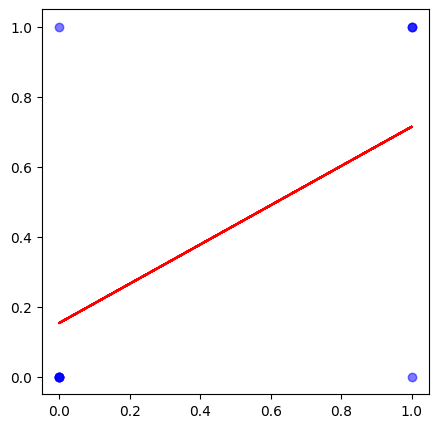

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_rf_test_pred are available
# Ensure the following line has been executed before this cell:
# y_rf_test_pred = rf.predict(x_test)

plt.figure(figsize=(5, 5))

# Scatter plot for test data
plt.scatter(y_test, y_rf_test_pred, alpha=0.3, color='blue', label='Actual vs Predicted')

# Fit a regression line
z = np.polyfit(y_test, y_rf_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', label='Best Fit Line')

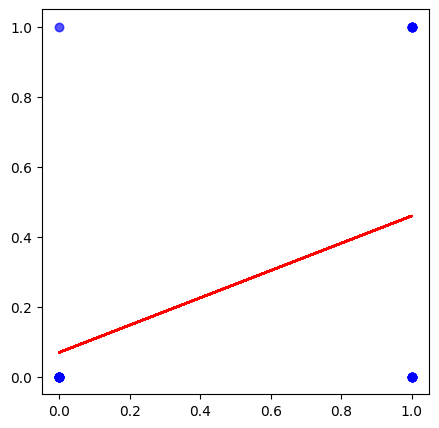

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5, 5))
plt.scatter(y_train, y_dt_train_pred, alpha=0.3, color='blue')

z = np.polyfit(y_train, y_dt_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color='red')



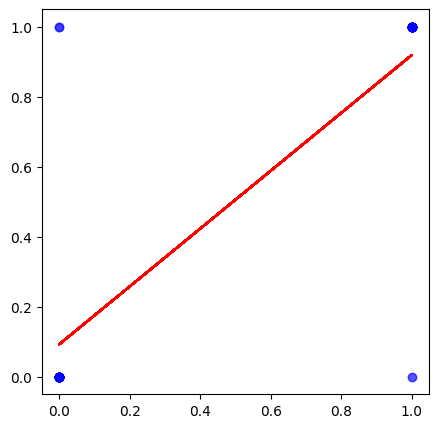

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5, 5))
plt.scatter(x=y_train, y=y_cb_train_pred, alpha=0.3, color='blue')

z = np.polyfit(y_train, y_cb_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color='red')

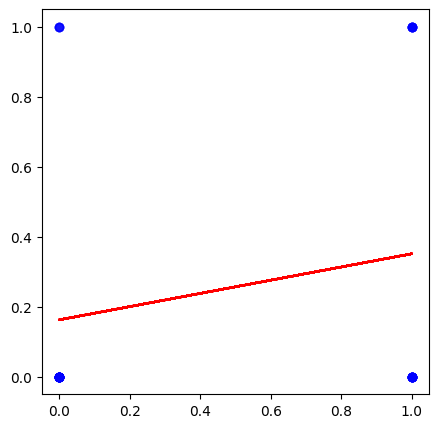

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5, 5))
plt.scatter(x=y_train, y=y_clf_train_pred, alpha=0.3, color='blue')

z = np.polyfit(y_train, y_clf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color='red')